In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-05-18 13:59:50--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  22.9MB/s    in 7.5s    

2023-05-18 13:59:58 (19.0 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [3]:
import zipfile
zipref=zipfile.ZipFile(r'horse-or-human.zip')
zipref.extractall('./horse-or-human')
zipref.close()

In [5]:
import os
train_human=os.path.join('./horse-or-human/humans')
train_horse=os.path.join('./horse-or-human/horses')

In [6]:
train_horse

'./horse-or-human/horses'

In [9]:
train_horse_names=os.listdir(train_horse)
print(train_horse_names[:10])
train_human_names=os.listdir(train_human)
print(train_human_names[:10])

['horse50-8.png', 'horse25-1.png', 'horse02-9.png', 'horse40-4.png', 'horse43-9.png', 'horse11-7.png', 'horse47-4.png', 'horse20-0.png', 'horse42-7.png', 'horse41-8.png']
['human07-06.png', 'human12-05.png', 'human09-19.png', 'human02-18.png', 'human17-11.png', 'human01-01.png', 'human15-23.png', 'human06-02.png', 'human09-18.png', 'human17-07.png']


In [12]:
print('total training horse images:', len(os.listdir(train_horse)))
print('total training human images:', len(os.listdir(train_human)))

total training horse images: 500
total training human images: 527


In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

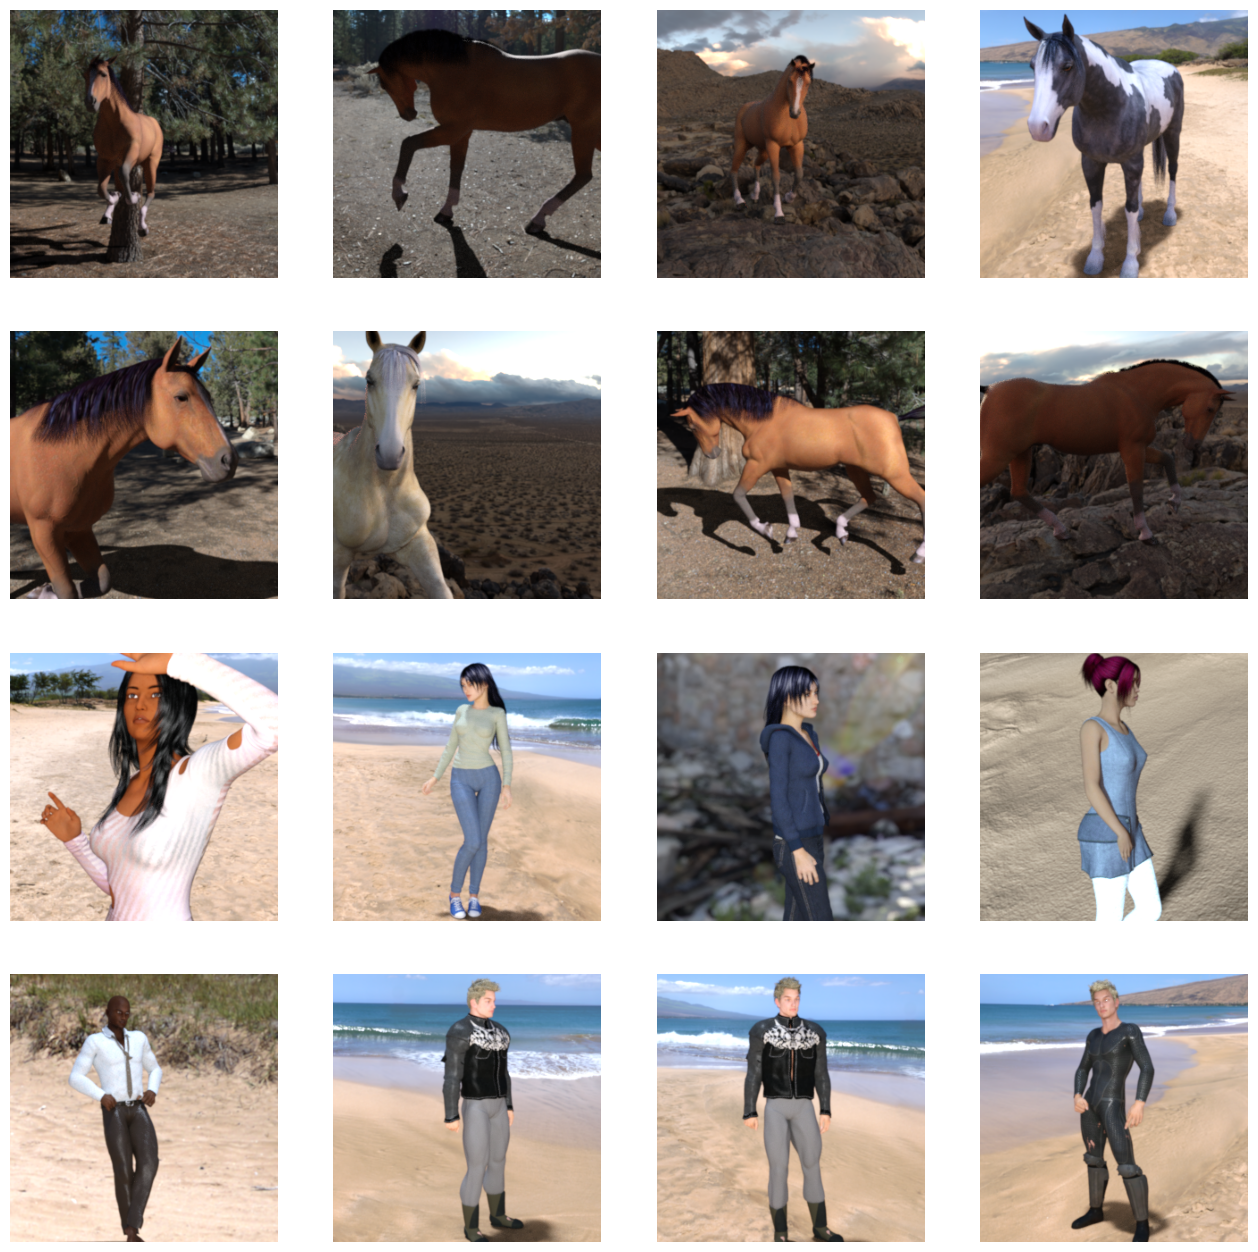

In [16]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [17]:
import tensorflow as tf

In [18]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [20]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [21]:
from tensorflow import keras

In [22]:
from keras.preprocessing.image import ImageDataGenerator

In [23]:
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator=train_datagen.flow_from_directory(
    './horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [24]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 22s 807ms/step - loss: 0.6970 - accuracy: 0.5829
Epoch 2/15
8/8 [==============================] - 7s 786ms/step - loss: 0.7680 - accuracy: 0.5740
Epoch 3/15
8/8 [==============================] - 7s 802ms/step - loss: 0.6137 - accuracy: 0.6618
Epoch 4/15
8/8 [==============================] - 7s 1s/step - loss: 0.8319 - accuracy: 0.6974
Epoch 5/15
8/8 [==============================] - 7s 798ms/step - loss: 0.4416 - accuracy: 0.8120
Epoch 6/15
8/8 [==============================] - 7s 782ms/step - loss: 0.3018 - accuracy: 0.8821
Epoch 7/15
8/8 [==============================] - 7s 895ms/step - loss: 0.2329 - accuracy: 0.9141
Epoch 8/15
8/8 [==============================] - 7s 1s/step - loss: 0.2427 - accuracy: 0.8999
Epoch 9/15
8/8 [==============================] - 7s 898ms/step - loss: 0.5255 - accuracy: 0.8565
Epoch 10/15
8/8 [==============================] - 6s 776ms/step - loss: 0.1602 - accuracy: 0.9444
Epoch 11/15
8/8 [=======

In [27]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
  print(fn)
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  #print(x)
  x = np.expand_dims(x, axis=0)
  #print(x)
  images = np.vstack([x])
  #print(images)
  classes = model.predict(images, batch_size=10)
  print(classes)
  print(classes[0])
    
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving horse1.jpg to horse1 (1).jpg
horse1.jpg
1/1 [==============================] - 0s 20ms/step
[[0.0043417]]
[0.0043417]
horse1.jpg is a horse
